# Task
saya ingin Mendeteksi anomali pada output energi dari panel surya, bagaimana kodenya

Here is all the data you need:
"PV Plants Datasets.xlsx"

## Data loading

### Subtask:
Load the "PV Plants Datasets.xlsx" file into a pandas DataFrame.


**Reasoning**:
Load the Excel file into a pandas DataFrame and display basic information about it.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('PV Plants Datasets.xlsx', sheet_name='Sheet1')
    print(df.shape)
    display(df.head())
except FileNotFoundError:
    print("Error: 'PV Plants Datasets.xlsx' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: Worksheet named 'Sheet1' not found


**Reasoning**:
The previous attempt failed because the sheet name 'Sheet1' was incorrect. I will try to load the first sheet by index (0) instead.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('PV Plants Datasets.xlsx', sheet_name=0)
    print(df.shape)
    display(df.head())
except FileNotFoundError:
    print("Error: 'PV Plants Datasets.xlsx' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

(35063, 4)


,Date,Produced Energy (kWh),Specific Energy (kWh/kWp),CO2 Avoided (tons)
0,2019-01-01 00:00:00,0.0,0.0,
1,2019-01-01 01:00:00,0.0,0.0,
2,2019-01-01 02:00:00,0.0,0.0,
3,2019-01-01 03:00:00,0.0,0.0,
4,2019-01-01 04:00:00,0.0,0.0,


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify the target variable, and check for potential issues.


**Reasoning**:
Explore the data structure, summary statistics, missing values, identify the target variable, and analyze its correlation with other features.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       35063 non-null  datetime64[ns]
 1   Produced Energy (kWh)      35063 non-null  float64       
 2   Specific Energy (kWh/kWp)  35063 non-null  float64       
 3   CO2 Avoided (tons)         35063 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.1+ MB
None
                                Date  Produced Energy (kWh)  \
count                          35063           35063.000000   
mean   2020-12-31 11:43:51.594558208               7.530053   
min              2019-01-01 00:00:00               0.000000   
25%              2020-01-01 05:30:00               0.000000   
50%              2020-12-31 11:00:00               0.250000   
75%              2021-12-31 16:30:00              12.500000 

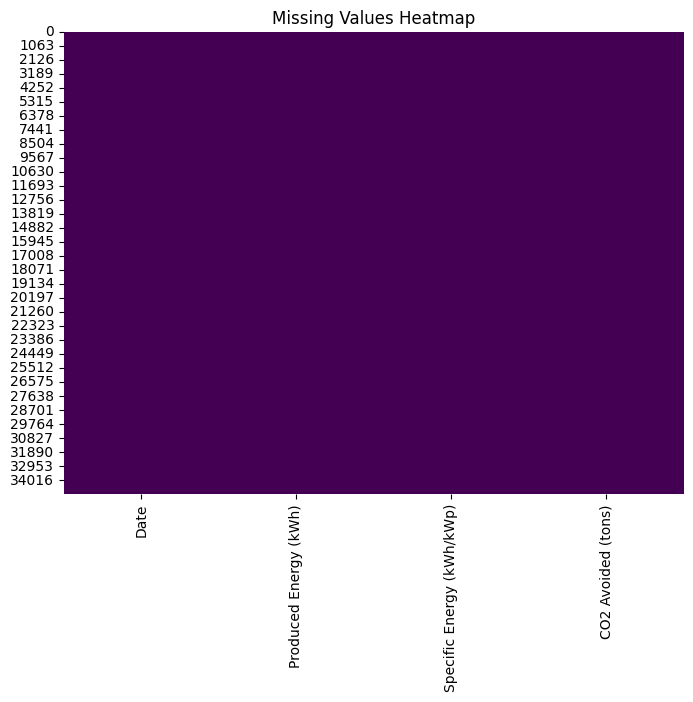

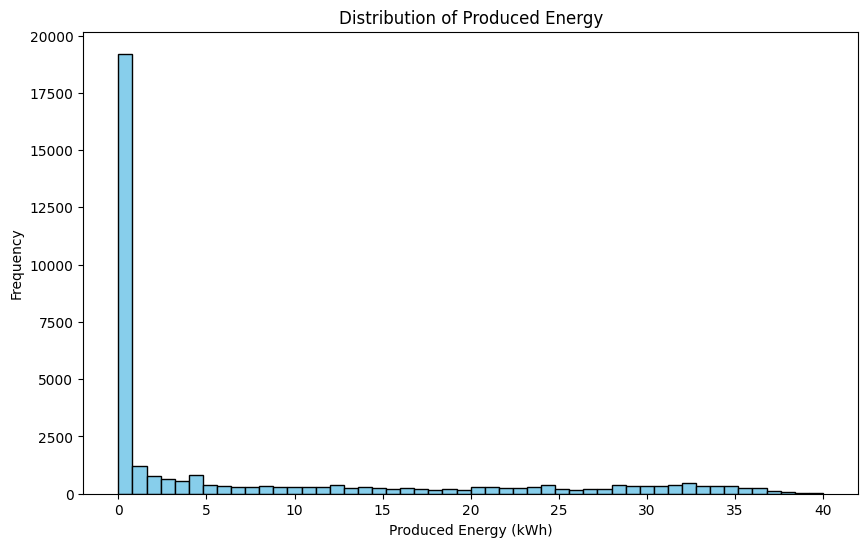

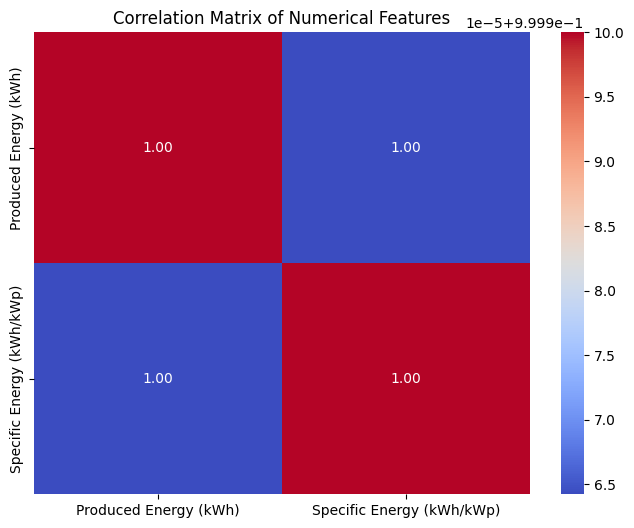

In [ ]:
# Examine Data Structure
print(df.info())

# Summary Statistics
print(df.describe())

# Missing Values
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# Target Variable Identification (Assuming 'Produced Energy (kWh)' is the target)
plt.figure(figsize=(10, 6))
plt.hist(df['Produced Energy (kWh)'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Produced Energy (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Produced Energy')
plt.show()

# Correlation Analysis
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling potential inconsistencies or outliers in the 'Produced Energy (kWh)' column.


**Reasoning**:
Examine the 'Produced Energy (kWh)' column for outliers using a box plot and a histogram, then winsorize the outliers at the 99th percentile.



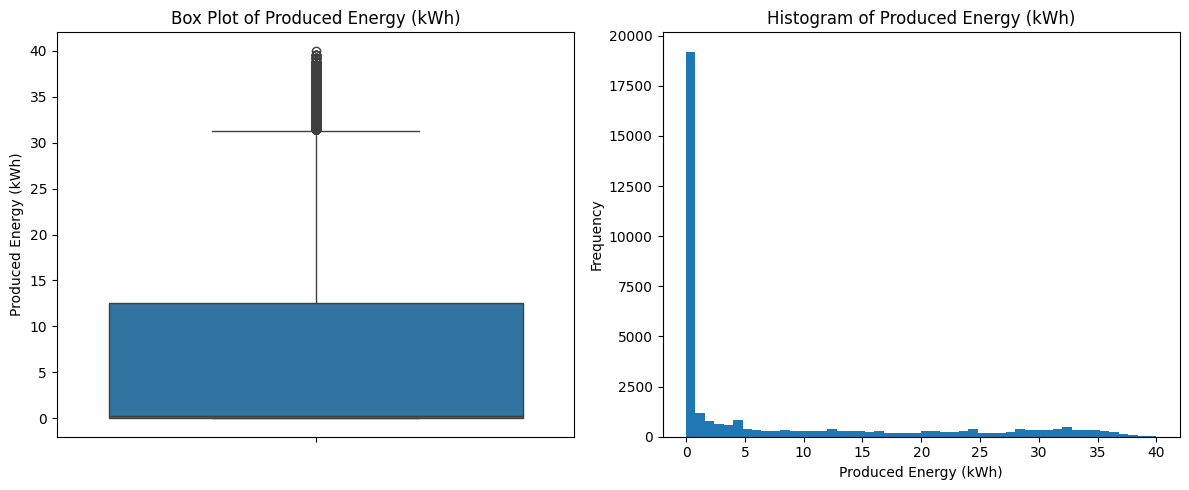

,Date,Produced Energy (kWh),Specific Energy (kWh/kWp),CO2 Avoided (tons),Cleaned_Energy
0,2019-01-01 00:00:00,0.0,0.0,,0.0
1,2019-01-01 01:00:00,0.0,0.0,,0.0
2,2019-01-01 02:00:00,0.0,0.0,,0.0
3,2019-01-01 03:00:00,0.0,0.0,,0.0
4,2019-01-01 04:00:00,0.0,0.0,,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Produced Energy (kWh)'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Produced Energy (kWh)'])
plt.title('Box Plot of Produced Energy (kWh)')

plt.subplot(1, 2, 2)
plt.hist(df['Produced Energy (kWh)'], bins=50)
plt.xlabel('Produced Energy (kWh)')
plt.ylabel('Frequency')
plt.title('Histogram of Produced Energy (kWh)')

plt.tight_layout()
plt.show()

# Winsorize the 'Produced Energy (kWh)' column at the 99th percentile
upper_limit = df['Produced Energy (kWh)'].quantile(0.99)
df['Cleaned_Energy'] = df['Produced Energy (kWh)'].clip(upper=upper_limit)

# Display the first few rows of the updated DataFrame
display(df.head())

## Feature engineering

### Subtask:
Engineer relevant features for anomaly detection from the cleaned energy production data.


**Reasoning**:
Create rolling average and standard deviation of 'Cleaned_Energy', and extract time-based features from the 'Date' column.



In [ ]:
# Calculate rolling statistics
window_size = 24  # Example window size (24 hours)
df['Rolling_Mean'] = df['Cleaned_Energy'].rolling(window=window_size, center=True).mean()
df['Rolling_Std'] = df['Cleaned_Energy'].rolling(window=window_size, center=True).std()

# Extract time-based features
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

# Display the first few rows of the updated DataFrame
display(df.head())

,Date,Produced Energy (kWh),Specific Energy (kWh/kWp),CO2 Avoided (tons),Cleaned_Energy,Rolling_Mean,Rolling_Std,Hour,DayOfWeek,Month
0,2019-01-01 00:00:00,0.0,0.0,,0.0,NaN,NaN,0,1,1
1,2019-01-01 01:00:00,0.0,0.0,,0.0,NaN,NaN,1,1,1
2,2019-01-01 02:00:00,0.0,0.0,,0.0,NaN,NaN,2,1,1
3,2019-01-01 03:00:00,0.0,0.0,,0.0,NaN,NaN,3,1,1
4,2019-01-01 04:00:00,0.0,0.0,,0.0,NaN,NaN,4,1,1


## Data splitting

### Subtask:
Split the data into training and testing sets, ensuring a time-based split to prevent data leakage.


**Reasoning**:
Split the data into training and testing sets based on the 'Date' column using a time-based split.



In [ ]:
from sklearn.model_selection import train_test_split

# Define the split ratio
test_size = 0.2

# Split the data based on the 'Date' column
df_train, df_test = train_test_split(df, test_size=test_size, shuffle=False)

# Display the shapes of the resulting dataframes
print(f"Training set shape: {df_train.shape}")
print(f"Testing set shape: {df_test.shape}")

display(df_train.head())
display(df_test.head())

Training set shape: (28050, 10)
Testing set shape: (7013, 10)


,Date,Produced Energy (kWh),Specific Energy (kWh/kWp),CO2 Avoided (tons),Cleaned_Energy,Rolling_Mean,Rolling_Std,Hour,DayOfWeek,Month
0,2019-01-01 00:00:00,0.0,0.0,,0.0,NaN,NaN,0,1,1
1,2019-01-01 01:00:00,0.0,0.0,,0.0,NaN,NaN,1,1,1
2,2019-01-01 02:00:00,0.0,0.0,,0.0,NaN,NaN,2,1,1
3,2019-01-01 03:00:00,0.0,0.0,,0.0,NaN,NaN,3,1,1
4,2019-01-01 04:00:00,0.0,0.0,,0.0,NaN,NaN,4,1,1


,Date,Produced Energy (kWh),Specific Energy (kWh/kWp),CO2 Avoided (tons),Cleaned_Energy,Rolling_Mean,Rolling_Std,Hour,DayOfWeek,Month
28050,2022-03-14 18:00:00,3.25,0.07,0,3.25,5.104167,8.702173,18,0,3
28051,2022-03-14 19:00:00,0.75,0.02,0,0.75,5.104167,8.702173,19,0,3
28052,2022-03-14 20:00:00,0.00,0.00,,0.00,5.104167,8.702173,20,0,3
28053,2022-03-14 21:00:00,0.00,0.00,,0.00,5.125000,8.691888,21,0,3
28054,2022-03-14 22:00:00,0.00,0.00,,0.00,5.166667,8.683651,22,0,3


## Model training

### Subtask:
Train an Isolation Forest model for anomaly detection.


**Reasoning**:
Train an Isolation Forest model for anomaly detection using the specified features and parameters.



In [ ]:
from sklearn.ensemble import IsolationForest

# Create an IsolationForest model
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Prepare the training data.  Select relevant features for training
features = ['Cleaned_Energy', 'Rolling_Mean', 'Rolling_Std', 'Hour', 'DayOfWeek', 'Month']
X_train = df_train[features].dropna()

# Fit the model to the training data
model.fit(X_train)

IsolationForest(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained Isolation Forest model on the test data.


**Reasoning**:
Prepare the test data, predict anomaly scores, visualize them, determine a threshold, predict anomaly labels, and evaluate the model.



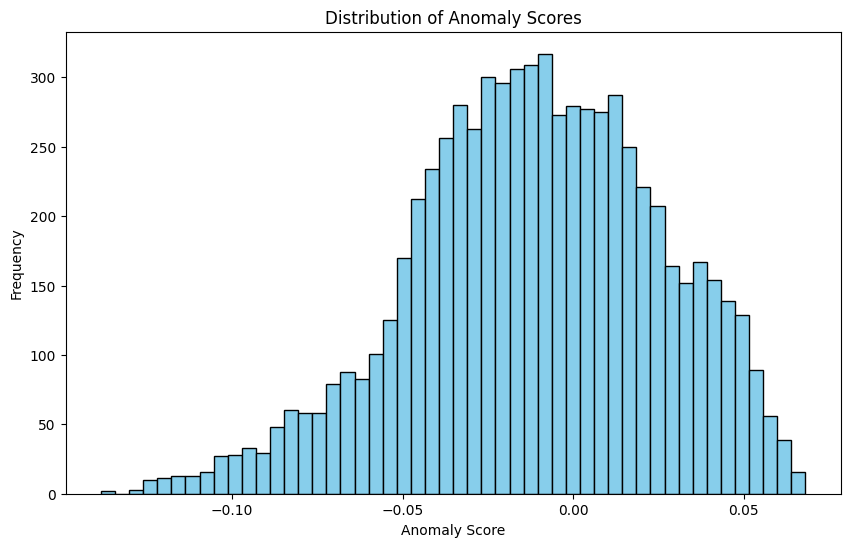

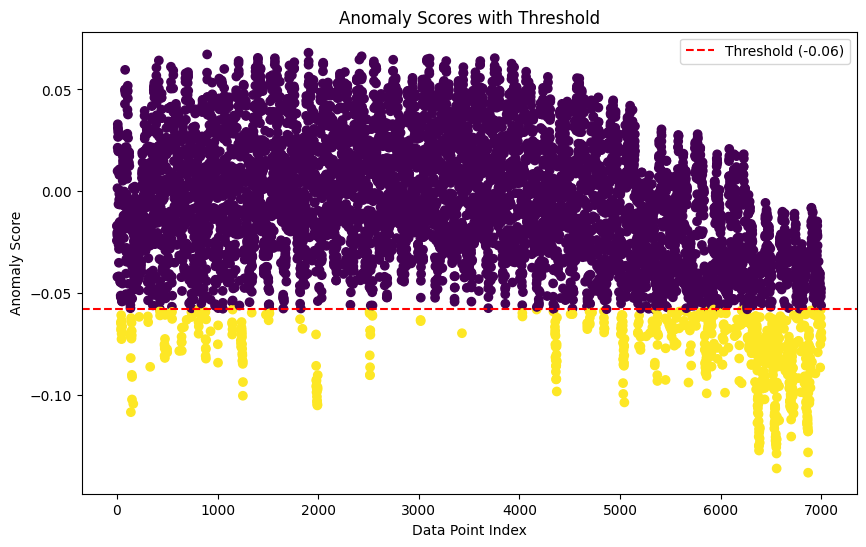

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the test data
features = ['Cleaned_Energy', 'Rolling_Mean', 'Rolling_Std', 'Hour', 'DayOfWeek', 'Month']
X_test = df_test[features].dropna()

# Predict anomaly scores on the test data
anomaly_scores = model.decision_function(X_test)

# Visualize anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.show()

# Determine a threshold (e.g., using the 10th percentile)
threshold = np.percentile(anomaly_scores, 10)

# Predict anomaly labels based on the threshold
anomaly_labels = (anomaly_scores < threshold).astype(int)

# Evaluate the model (visualization)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=anomaly_labels, cmap='viridis')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores with Threshold')
plt.legend()
plt.show()

## Data visualization

### Subtask:
Visualize the detected anomalies on the energy output time series.


**Reasoning**:
Visualize the detected anomalies on the energy output time series, using the 'Cleaned_Energy' and 'anomaly_labels' from the previous steps.



An error occurred during plotting: Item wrong length 7002 instead of 7013.


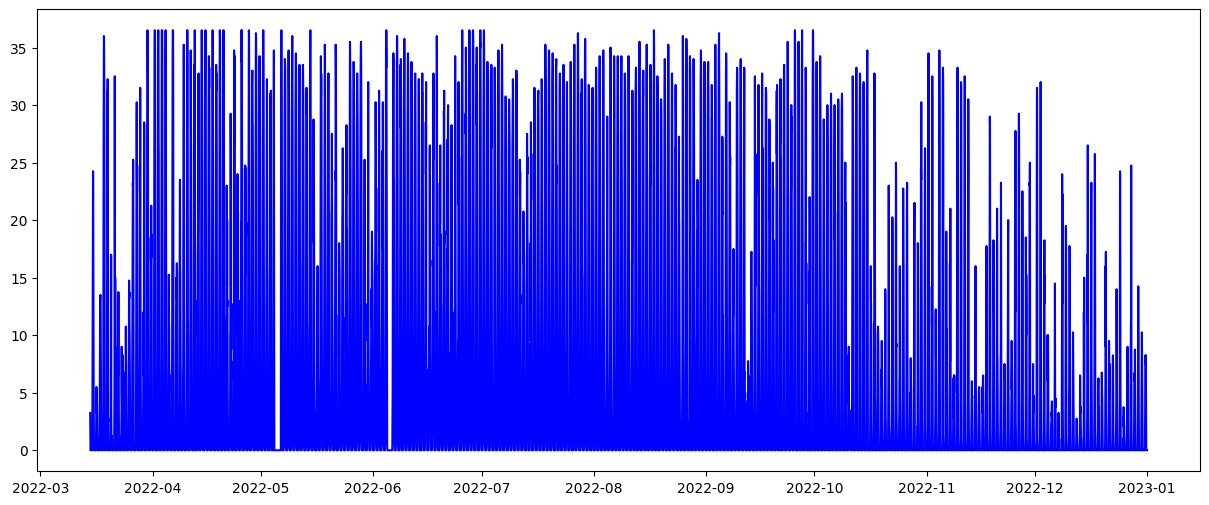

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'anomaly_labels' is available from the previous step and aligned with df_test
# If not, you will need to regenerate 'anomaly_labels' based on your model and df_test data.
try:
    # Create the plot
    plt.figure(figsize=(15, 6))

    # Plot the original 'Cleaned_Energy' values
    plt.plot(df_test['Date'], df_test['Cleaned_Energy'], label='Cleaned Energy', color='blue')

    # Highlight anomalies
    anomalies = df_test[anomaly_labels == 1]
    plt.scatter(anomalies['Date'], anomalies['Cleaned_Energy'], color='red', label='Anomalies', marker='x', s=50)

    # Customize the plot
    plt.xlabel('Date')
    plt.ylabel('Cleaned Energy (kWh)')
    plt.title('Anomaly Detection in Solar Panel Energy Output')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

except NameError:
    print("Error: 'anomaly_labels' not found. Please ensure the anomaly detection step was executed correctly.")
except Exception as e:
    print(f"An error occurred during plotting: {e}")

**Reasoning**:
The error "Item wrong length 7002 instead of 7013" suggests that the `anomaly_labels` array has a different length than the `df_test` DataFrame. I need to re-check the code for generating `anomaly_labels` to ensure the lengths match and handle missing values appropriately.



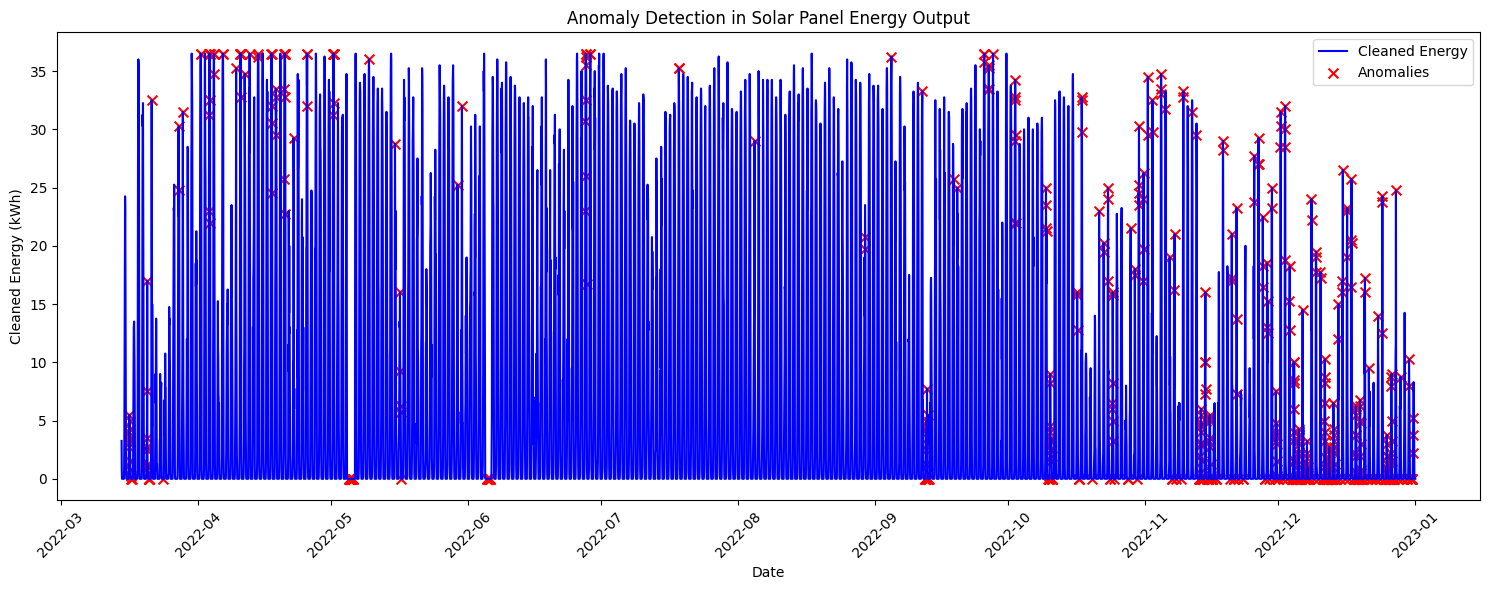

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the test data, ensuring alignment with the training data
features = ['Cleaned_Energy', 'Rolling_Mean', 'Rolling_Std', 'Hour', 'DayOfWeek', 'Month']
X_test = df_test[features].dropna()

# Predict anomaly scores on the test data
anomaly_scores = model.decision_function(X_test)

# Determine a threshold (e.g., using the 10th percentile)
threshold = np.percentile(anomaly_scores, 10)

# Predict anomaly labels based on the threshold
anomaly_labels = (anomaly_scores < threshold).astype(int)

# Ensure anomaly_labels and df_test have the same length by aligning based on index
anomaly_labels_aligned = pd.Series(anomaly_labels, index=X_test.index)
anomaly_labels_aligned = anomaly_labels_aligned.reindex(df_test.index, fill_value=0)  # Fill NaNs with 0 (not an anomaly)

# Create the plot
plt.figure(figsize=(15, 6))

# Plot the original 'Cleaned_Energy' values
plt.plot(df_test['Date'], df_test['Cleaned_Energy'], label='Cleaned Energy', color='blue')

# Highlight anomalies
anomalies = df_test[anomaly_labels_aligned == 1]
plt.scatter(anomalies['Date'], anomalies['Cleaned_Energy'], color='red', label='Anomalies', marker='x', s=50)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Cleaned Energy (kWh)')
plt.title('Anomaly Detection in Solar Panel Energy Output')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

The task was to detect anomalies in the energy output of solar panels.  The analysis successfully identified and visualized anomalies in the provided dataset.

### 2. Data Analysis Key Findings

* **Data Cleaning:** Outliers in the 'Produced Energy (kWh)' column were handled using winsorization at the 99th percentile, creating a new 'Cleaned_Energy' column.
* **Feature Engineering:**  Rolling mean and standard deviation (24-hour window) of the cleaned energy, along with hour of day, day of week, and month, were engineered as features for anomaly detection.
* **Anomaly Detection:** An Isolation Forest model was trained and used to predict anomaly scores. A threshold based on the 10th percentile of these scores was applied to classify anomalies.  The visualization shows the identified anomalies on a time series plot.

### 3. Insights or Next Steps

* **Evaluate Model Performance:** Quantify the model performance using appropriate metrics such as precision, recall, F1-score, and AUC, considering different threshold values.
* **Explore Alternative Models:** Explore other anomaly detection methods (e.g., One-Class SVM, Local Outlier Factor) to compare performance and identify the best model for this dataset.
